In [1]:
import opossom as op
import opossom.column as col
import pandas as pd
import seaborn.objects as so

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv"
penguins = op.Table(pd.read_csv(url))

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
penguins[op.slice()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
penguins[op.slice(2)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


In [6]:
penguins[op.slice(2, 4)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


In [7]:
penguins[op.slice(0, 10, 2)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007


In [8]:
penguins[
    op.select("species", "island", "sex", "year"),
    op.slice(),
]

,species,island,sex,year
0,Adelie,Torgersen,male,2007
1,Adelie,Torgersen,female,2007
2,Adelie,Torgersen,female,2007
3,Adelie,Torgersen,NaN,2007
4,Adelie,Torgersen,female,2007


In [9]:
penguins[op.count()]

,count
0,344


In [10]:
penguins[op.count("species")]

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [11]:
penguins[op.count("island")]

,island,count
0,Biscoe,168
1,Dream,124
2,Torgersen,52


In [12]:
penguins[op.count("species", "island")]

,species,island,count
0,Gentoo,Biscoe,124
1,Chinstrap,Dream,68
2,Adelie,Dream,56
3,Adelie,Torgersen,52
4,Adelie,Biscoe,44


In [13]:
col.str("species").upper().title().lower()

StrColumn([operator.itemgetter('species'), operator.attrgetter('str'), operator.methodcaller('upper'), operator.attrgetter('str'), operator.methodcaller('title'), operator.attrgetter('str'), operator.methodcaller('lower')])

In [14]:
col.str("species").upper().title().lower()(penguins.data)

0         adelie
1         adelie
2         adelie
3         adelie
4         adelie
         ...    
339    chinstrap
340    chinstrap
341    chinstrap
342    chinstrap
343    chinstrap
Name: species, Length: 344, dtype: object

In [15]:
penguins[col.str("species").upper().title().lower()]

,species
0,adelie
1,adelie
2,adelie
3,adelie
4,adelie
...,...
339,chinstrap
340,chinstrap
341,chinstrap
342,chinstrap


In [16]:
penguins[
    op.mutate({"upper_species": col.str("species").upper()}),
]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,upper_species
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,ADELIE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,ADELIE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,ADELIE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,ADELIE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,ADELIE
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,CHINSTRAP
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,CHINSTRAP
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,CHINSTRAP
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,CHINSTRAP


In [17]:
penguins[
    op.mutate({
        "species": col.str("species").upper(),
        "island": col.str("island").upper(),
    }),
    op.count("species", "island"),
]

,species,island,count
0,GENTOO,BISCOE,124
1,CHINSTRAP,DREAM,68
2,ADELIE,DREAM,56
3,ADELIE,TORGERSEN,52
4,ADELIE,BISCOE,44


In [18]:
# This should ideally work
penguins[
    op.count({
        "species": col.str("species").upper(),
        "island": col.str("island").upper(),
    }),
]

,level_0,count


In [19]:
penguins[
    op.count("species"),
    op.sort("count", reverse=True),
]

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [20]:
penguins[
    op.sort("island", "species"),
    op.slice(),
]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female,2007
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male,2007
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female,2007
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male,2007
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male,2007


In [21]:
penguins[
    op.filter(col.str("species") == "Gentoo"),
    op.slice(),
]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007


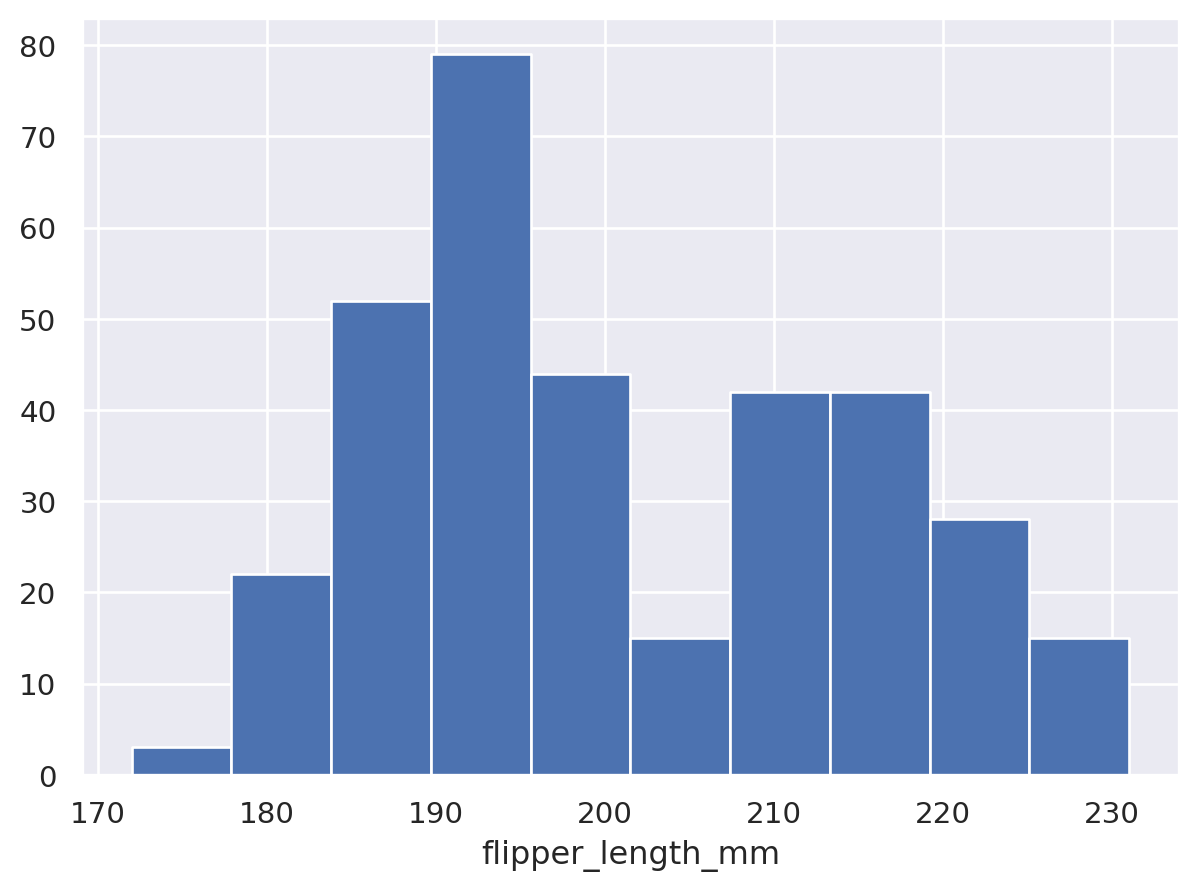

In [22]:
so.Plot(penguins.data, "flipper_length_mm").add(so.Bars(alpha=1), so.Hist())

In [23]:
penguins[
    op.filter(col.num("flipper_length_mm") > 200),
    op.count(),
]

,count
0,148


In [24]:
penguins[
    op.filter(col.num("flipper_length_mm") > col.num("flipper_length_mm").mean()),
    op.slice(),
]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [25]:
penguins[
    op.rollup({
        "count": col.count(),
        "mean_bill_length": col.num("bill_length_mm").mean(),
    }),
]

,count,mean_bill_length
0,2752,43.92193


In [26]:
penguins[
    op.rollup({
        "count": col.count(),
        "mean_bill_length": col.num("bill_length_mm").mean(),
        },
        by="species",
    ),
]

,species,count,mean_bill_length
0,Adelie,152,38.791391
1,Chinstrap,68,48.833824
2,Gentoo,124,47.504878


In [27]:
penguins[
    op.rollup({
        "count": col.count(),
        "mean_bill_length": col.num("bill_length_mm").mean(),
        },
        by=["species", "island"],
    ),
]

,species,island,count,mean_bill_length
0,Adelie,Biscoe,44,38.975000
1,Adelie,Dream,56,38.501786
2,Adelie,Torgersen,52,38.950980
3,Chinstrap,Dream,68,48.833824
4,Gentoo,Biscoe,124,47.504878


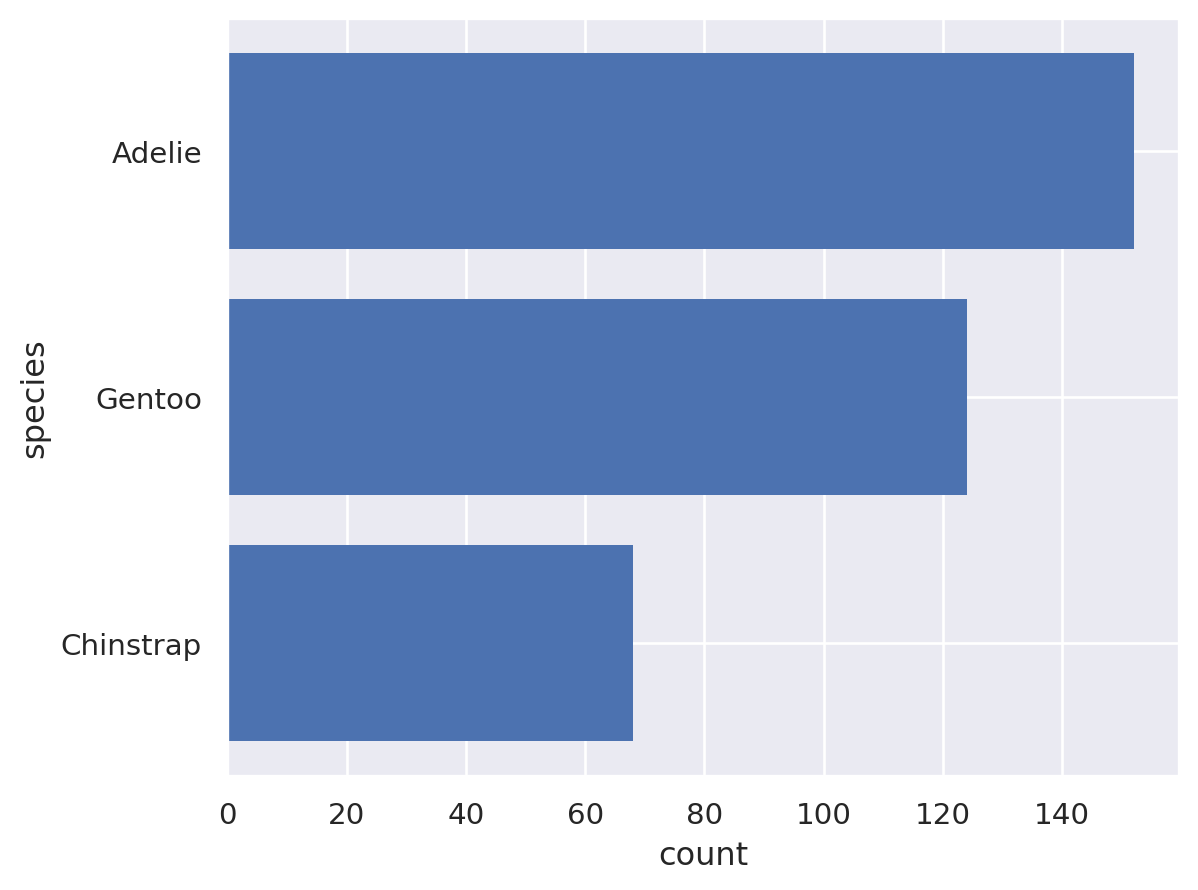

In [28]:
so.Plot(
    penguins[op.count("species"), op.sort("count")].data,
    x="count",
    y="species",
).add(so.Bar(alpha=1))

In [29]:
def filter_gentoo(table):
    return op.Table(table)[
        op.filter(col.str("species") == "Gentoo"),
    ]

In [57]:
penguins[
    filter_gentoo,
    op.count("sex"),
    op.sort("sex"),
    op.mutate({"pct": col.num("count") / col.num("count").sum()}),  # This isn't working
]

,sex,count,pct
1,female,58,"NumColumn([operator.itemgetter('count'), opera..."
0,male,61,"NumColumn([operator.itemgetter('count'), opera..."


In [31]:
penguins[op.rename({"location": "island"}), op.slice()]

,species,location,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [32]:
penguins[
    op.rename(lambda name: name.replace("_", "-")),
    op.slice(),
]

,species,island,bill-length-mm,bill-depth-mm,flipper-length-mm,body-mass-g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [33]:
import string

def prettify_names(name):
    name = name.title()
    replacements = {"_": " ", "Mm": "(mm)", "G": "(g)"}
    
    for old, new in replacements.items():
        name = name.replace(old, new)
        
    return name


def clean_names(name: str):
    name = name.casefold()
    name = " ".join(word for word in name.split())
    replacements = {" ": "_"}

    for old, new in replacements.items():
        name = name.replace(old, new)
        
    name = "".join(
        letter for letter in list(name)
        if letter in list(string.ascii_lowercase + string.digits + "_")
    )

    return name

In [34]:
penguins[op.rename(prettify_names), op.slice()]

,Species,Island,Bill Length (mm),Bill Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [35]:
penguins[op.rename(prettify_names), op.rename(clean_names), op.slice()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [36]:
penguins[op.dropna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [37]:
penguins[op.dropna("sex")]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [38]:
len(penguins)

344

In [39]:
penguins[op.fillna(value=0)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [40]:
penguins[op.fillna("sex", value="unknown")]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,unknown,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [41]:
penguins[op.fillna("bill_length_mm", method="ffill")]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,40.3,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [42]:
penguins[op.count()]

,count
0,344


In [43]:
penguins[col.count()]  # Can use `col` if you just want the count

,count
0,2752


In [44]:
penguins[op.rollup({"total": op.count()})]  # Can use `op` or `col` for count in this context

,total
0,344


In [45]:
# penguins[op.rollup({"total": op.count("species")})]  # This is supposed to error

In [46]:
penguins[
    op.filter(col.num("flipper_length_mm") > 200),
    op.count("species"),
    op.slice()
]

,species,count
0,Gentoo,123
1,Chinstrap,18
2,Adelie,7


In [47]:
(
    penguins.data[lambda df: df["flipper_length_mm"] > 200]
    .value_counts("species")
    .reset_index(name="count")
    .head()
)

,species,count
0,Gentoo,123
1,Chinstrap,18
2,Adelie,7


In [48]:
penguins[
    lambda t: t[lambda t2: t2["flipper_length_mm"] > 200]
    .value_counts("species")
    .reset_index(name="count")
    .head()
]

,species,count
0,Gentoo,123
1,Chinstrap,18
2,Adelie,7


In [49]:
by_species = op.count("species")

In [50]:
by_species

<function opossom.table.verbs.count.<locals>.inner(table)>

In [51]:
penguins[
    op.filter(col.num("flipper_length_mm") > 200),
    by_species,
]

,species,count
0,Gentoo,123
1,Chinstrap,18
2,Adelie,7


In [52]:
penguins[
    op.filter(col.num("body_mass_g") > 200),
    by_species,
]

,species,count
0,Adelie,151
1,Gentoo,123
2,Chinstrap,68


In [53]:
penguins[
    op.count("year", "species", "island"),
    op.slice(5),
]

,year,species,island,count
0,2008,Gentoo,Biscoe,46
1,2009,Gentoo,Biscoe,44
2,2007,Gentoo,Biscoe,34
3,2007,Chinstrap,Dream,26
4,2009,Chinstrap,Dream,24


In [54]:
top_5_by_dims = [
    op.count("year", "species", "island"),
    op.slice(5),
]

In [55]:
penguins[
    op.filter(col.num("body_mass_g") > 200),
    top_5_by_dims,
]

,year,species,island,count
0,2008,Gentoo,Biscoe,46
1,2009,Gentoo,Biscoe,43
2,2007,Gentoo,Biscoe,34
3,2007,Chinstrap,Dream,26
4,2009,Chinstrap,Dream,24


In [56]:
penguins[
    op.filter(col.num("flipper_length_mm") > 200),
    top_5_by_dims,
]

,year,species,island,count
0,2008,Gentoo,Biscoe,46
1,2009,Gentoo,Biscoe,43
2,2007,Gentoo,Biscoe,34
3,2009,Chinstrap,Dream,10
4,2008,Chinstrap,Dream,6
